# 3 排序图

## 3.5 哑铃图

横坐标：医疗支出占人均GDP的百分比<br>
纵坐标：城市名称<br>
浅蓝色的点：2014年<br>
深蓝色的点：2013年

### 3.5.1 导入需要的绘图库

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 3.5.2 探索数据，处理数据

In [2]:
#导入数据
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/health.csv")

In [3]:
df.head()

,Area,pct_2014,pct_2013
0,Houston,0.19,0.22
1,Miami,0.19,0.24
2,Dallas,0.18,0.21
3,San Antonio,0.15,0.19
4,Atlanta,0.15,0.18


In [4]:
names = ['地区', '2014年医疗费用百分比', '2013年医疗费用百分比']

In [5]:
df.sort_values('pct_2014', inplace = True)

In [7]:
df.head()

,Area,pct_2014,pct_2013
25,Boston,0.04,0.04
23,Pittsburgh,0.06,0.07
22,Baltimore,0.06,0.09
24,Minneapolis,0.06,0.08
21,San Francisco,0.08,0.11


In [8]:
df.reset_index(inplace = True)

In [10]:
df.head() #索引取出来，变成一列新的特征，作为纵坐标的标尺

,index,Area,pct_2014,pct_2013
0,25,Boston,0.04,0.04
1,23,Pittsburgh,0.06,0.07
2,22,Baltimore,0.06,0.09
3,24,Minneapolis,0.06,0.08
4,21,San Francisco,0.08,0.11


### 3.5.3 代码详解

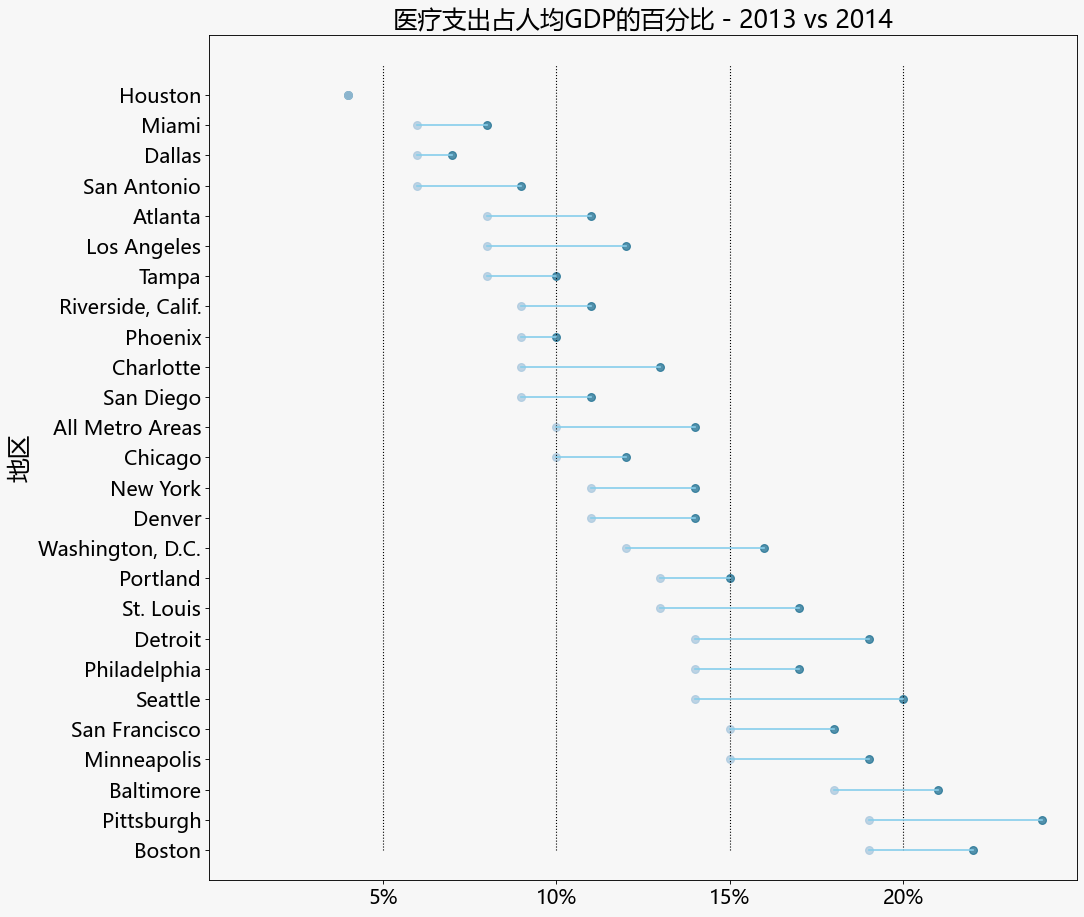

In [19]:
#定义绘制折现的函数
def newline(p1, p2, color = 'black'):
    ax = plt.gca() #get current ax获取子图，如果没有子图则创建子图
    l = mlines.Line2D([p1[0], p2[0]]
                     ,[p1[1], p2[1]]
                     ,color = 'skyblue'
                     )
    ax.add_line(l)
    return l

#建立子图和画布
fig, ax = plt.subplots(1,1, figsize=(14,14)
                      ,facecolor = '#f7f7f7'
                      ,dpi = 80
                      )

#绘制四条竖线
ax.vlines(x = 0.05, ymin = 0, ymax = 26, color = 'black', alpha = 1, linewidth = 1, linestyle = 'dotted')
ax.vlines(x = 0.10, ymin = 0, ymax = 26, color = 'black', alpha = 1, linewidth = 1, linestyle = 'dotted')
ax.vlines(x = 0.15, ymin = 0, ymax = 26, color = 'black', alpha = 1, linewidth = 1, linestyle = 'dotted')
ax.vlines(x = 0.20, ymin = 0, ymax = 26, color = 'black', alpha = 1, linewidth = 1, linestyle = 'dotted')

#绘制需要连线的点
ax.scatter(y = df['index'], x = df['pct_2013'], s = 50, color = '#0e668b', alpha = 0.7)
ax.scatter(y = df['index'], x = df['pct_2014'], s = 50, color = '#a3c4dc', alpha = 0.7)

#把线连起来
for i, p1, p2 in zip(df['index'], df['pct_2013'], df['pct_2014']):
    newline([p1, i], [p2, i])
    
#装饰图像
ax.set_facecolor('#f7f7f7') #子图的背景色
plt.rcParams['font.sans-serif'] = ['Microsoft Yahei']
ax.set_title("医疗支出占人均GDP的百分比 - 2013 vs 2014", fontdict = {'size':22})
ax.set(xlim=(0, 0.25), ylim=(-1, 27))
ax.set_ylabel('地区', fontsize = 22)

#设置xy轴上的标尺&标题
ax.set_xticks([0.05, 0.1, 0.15, 0.20])
ax.set_yticks(range(26)) #只能设置标尺
ax.set_yticklabels(df.Area, fontdict = {'size':18}) #设置的是标尺的名称，可以设置字体大小
ax.set_xticklabels(['5%', '10%', '15%', '20%'], fontdict = {'size':18})

plt.show()

### 3.5.4 图像解读

除了Houston，其他地区均下降，可能说明有了新的政策，比如医保、报销等，也可能与人均GDP上升有关。